<a href="https://colab.research.google.com/github/plaban1981/open_cv_projects/blob/main/Age_detection_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/opencv-age-detection/opencv-age-detection.zip
!unzip -qq opencv-age-detection.zip
%cd opencv-age-detection

--2020-12-23 11:28:04--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/opencv-age-detection/opencv-age-detection.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.204.8
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.204.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53347294 (51M) [application/zip]
Saving to: ‘opencv-age-detection.zip’

opencv-age-detectio 100%[===================>]  50.88M  27.8MB/s    in 1.8s    

2020-12-23 11:28:06 (27.8 MB/s) - ‘opencv-age-detection.zip’ saved [53347294/53347294]

/content/opencv-age-detection


In [3]:
!git clone https://github.com/smahesh29/Gender-and-Age-Detection

Cloning into 'Gender-and-Age-Detection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 60
Unpacking objects: 100% (63/63), done.


**Import Packages**

In [4]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2
import os

**Function to Display Images**

In [5]:
def plt_imshow(title,image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

**Implementing our OpenCV age detector for images**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


IMG-20140529-WA0013.jpg

plabannayak.jpg

In [17]:
args = {
    "image": "/content/opencv-age-detection/Gender-and-Age-Detection/girl1.jpg",
    "face": "face_detector",
    "age": "age_detector",
    "gender":"gender_detector",
    "confidence": 0.5
}

In [18]:
args

{'age': 'age_detector',
 'confidence': 0.5,
 'face': 'face_detector',
 'gender': 'gender_detector',
 'image': '/content/opencv-age-detection/Gender-and-Age-Detection/girl1.jpg'}

In [7]:
# define the list of age buckets our age detector will predict
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)",
	"(38-43)", "(48-53)", "(60-100)"]

In [8]:
genderList=['Male','Female']

In [9]:
MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)

**Load Face Detector**

In [10]:
os.path.sep.join([args["face"], "deploy.prototxt"])

'face_detector/deploy.prototxt'

In [11]:
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

**Load Age Detector**

In [12]:
os.path.sep.join([args["age"], "age_deploy.prototxt"])

'age_detector/age_deploy.prototxt'

In [13]:
prototxtPath = os.path.sep.join([args["age"], "age_deploy.prototxt"])
weightsPath = os.path.sep.join([args["age"], "age_net.caffemodel"])
ageNet = cv2.dnn.readNet(prototxtPath, weightsPath)

**Load Gender Detector**

In [14]:
genderProto="/content/opencv-age-detection/Gender-and-Age-Detection/gender_deploy.prototxt"
genderModel="/content/opencv-age-detection/Gender-and-Age-Detection/gender_net.caffemodel"
genderNet=cv2.dnn.readNet(genderModel,genderProto)

In [19]:
# load the input image and construct an input blob for the image
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image,  1.0, (300, 300), [104, 117, 123], True, False)

In [20]:
faceNet.setInput(blob)
detections = faceNet.forward()

[[0.08072467 0.91927534]]
[INFO] Gender : Female (25-32): 75.14%


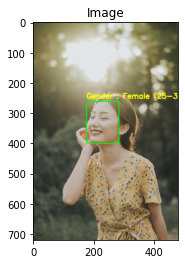

In [21]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# extract the ROI of the face and then construct a blob from
		# *only* the face ROI
		face = image[startY:endY, startX:endX]
		faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
			(78.4263377603, 87.7689143744, 114.895847746),
			swapRB=False)

        # make predictions on the age and find the age bucket with
		# the largest corresponding probability
		ageNet.setInput(faceBlob)
		preds = ageNet.forward()
		i = preds[0].argmax()
		age = AGE_BUCKETS[i]
		ageConfidence = preds[0][i]
    #
		genderNet.setInput(faceBlob)
		genderPreds=genderNet.forward()
		gender=genderList[genderPreds[0].argmax()]
		print(genderPreds)
		# display the predicted gender and age to our terminal
		text = "{}: {:.2f}%".format(age, ageConfidence * 100)
		#
		text = "Gender : " + gender + " "+text
		print("[INFO] {}".format(text))

		# draw the bounding box of the face along with the associated
		# predicted age
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 255, 0), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)

# display the output image
plt_imshow("Image", image)

In [41]:
!wget https://i9.dainikbhaskar.com/thumbnail/680x588/web2images/english.fashion101.in/2017/02/21/untitled-1cffd_1487660422.jpg

--2020-12-23 13:08:31--  https://i9.dainikbhaskar.com/thumbnail/680x588/web2images/english.fashion101.in/2017/02/21/untitled-1cffd_1487660422.jpg
Resolving i9.dainikbhaskar.com (i9.dainikbhaskar.com)... 104.18.4.54, 104.18.5.54, 2606:4700::6812:436, ...
Connecting to i9.dainikbhaskar.com (i9.dainikbhaskar.com)|104.18.4.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59393 (58K) [image/webp]
Saving to: ‘untitled-1cffd_1487660422.jpg’

untitled-1cffd_1487 100%[===================>]  58.00K  --.-KB/s    in 0s      

2020-12-23 13:08:32 (163 MB/s) - ‘untitled-1cffd_1487660422.jpg’ saved [59393/59393]



In [28]:
def detect_age_gender(image_name):
  image = cv2.imread(image_name)
  (h,w) = image.shape[:2]
  #create Blob from image
  blob = cv2.dnn.blobFromImage(image,  1.0, (300, 300), [104, 117, 123], True, False)
  faceNet.setInput(blob)
  #pass the blob created through the face detection model
  detections = faceNet.forward()
  #loop over the deductions
  for i in range(0, detections.shape[2]):
    #extract the confidence associated with the predictions
    confidence = detections[0,0,i,2]
    if confidence > 0.5:
      #compute x,y coordinates of the bounding box for the object
      box = detections[0,0,i,3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")
      #extract ROI of the face detected and construct a blob 
      face = image[startY:endY, startX:endX]
      faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
			(78.4263377603, 87.7689143744, 114.895847746),
			swapRB=False)

      # make predictions on the age and 
      #find age bucket with the largest probability
      ageNet.setInput(faceBlob)
      preds = ageNet.forward()
      i = preds[0].argmax()
      age = AGE_BUCKETS[i]
      ageConfidence = preds[0][i]
      #make predictions on the gender and
      #find the largest probability corresonding to the gender list
      genderNet.setInput(faceBlob)
      genderPreds=genderNet.forward()
      gender=genderList[genderPreds[0].argmax()]
      genderConfidence = genderPreds[0][genderPreds[0].argmax()]
      print(genderPreds,genderConfidence)
      # display the predicted gender and age to our terminal
      text = "{}: {:.2f}%".format(age, ageConfidence * 100)
      gndr = "{}: {:.2f}%".format(gender, genderConfidence * 100)
      text = gndr + text
      print("[Predictions] {}".format(text))
      # draw the bounding box of the face along with the associated
      # age and gender
      y = startY - 10 if startY - 10 > 10 else startY + 10
      cv2.rectangle(image, (startX, startY), (endX, endY),(0,255,0),2)
      cv2.putText(image, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                  (0,255,255), 2, cv2.LINE_AA)
  #display output image
  plt_imshow("Image", image)




In [42]:
image_list = ["/content/opencv-age-detection/Gender-and-Age-Detection/girl1.jpg",
              "/content/opencv-age-detection/clooney-cruise-1200.jpg",
              "/content/opencv-age-detection/Gender-and-Age-Detection/man1.jpg",
              "/content/opencv-age-detection/Gender-and-Age-Detection/man2.jpg",
              "/content/opencv-age-detection/Gender-and-Age-Detection/woman1.jpg",
              "/content/opencv-age-detection/untitled-1cffd_1487660422.jpg",
              "/content/opencv-age-detection/priyanka-1021x580.jpg",
              "/content/opencv-age-detection/1BBEB138-3B34-4C99-9AD3-529ED0CDEEFF.jpg?itok=oX1g-Qs7"            
]

[[0.08072467 0.91927534]] 0.91927534
[Predictions] Female: 91.93%(25-32): 75.14%


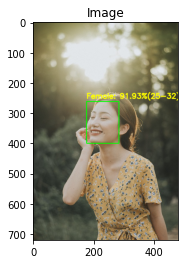

[[9.9925905e-01 7.4088457e-04]] 0.99925905
[Predictions] Male: 99.93%(25-32): 77.82%
[[9.999336e-01 6.643647e-05]] 0.9999336
[Predictions] Male: 99.99%(38-43): 47.99%


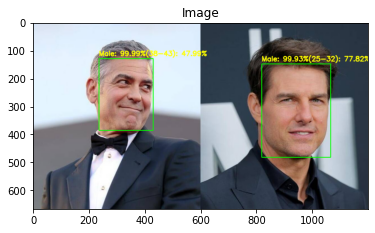

[[0.56803584 0.43196413]] 0.56803584
[Predictions] Male: 56.80%(25-32): 94.97%


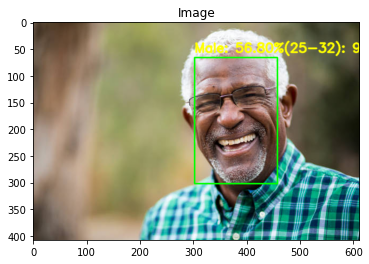

[[9.9999785e-01 2.1816254e-06]] 0.99999785
[Predictions] Male: 100.00%(25-32): 96.90%


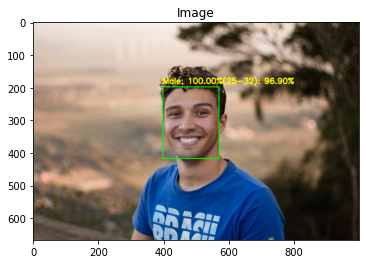

[[0.04348733 0.95651275]] 0.95651275
[Predictions] Female: 95.65%(38-43): 45.69%


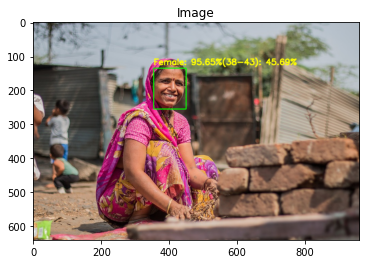

[[9.9988210e-01 1.1794359e-04]] 0.9998821
[Predictions] Male: 99.99%(25-32): 75.56%
[[0.99080807 0.00919192]] 0.99080807
[Predictions] Male: 99.08%(8-12): 82.83%


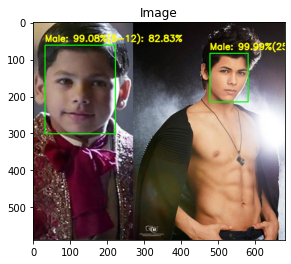

[[0.28089005 0.71911   ]] 0.71911
[Predictions] Female: 71.91%(25-32): 78.41%
[[0.9355394  0.06446052]] 0.9355394
[Predictions] Male: 93.55%(0-2): 73.44%


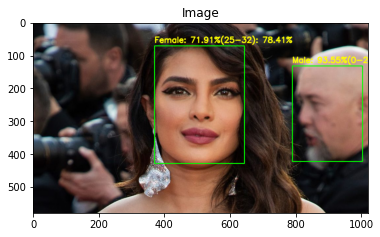

[[0.05453521 0.9454648 ]] 0.9454648
[Predictions] Female: 94.55%(25-32): 49.59%


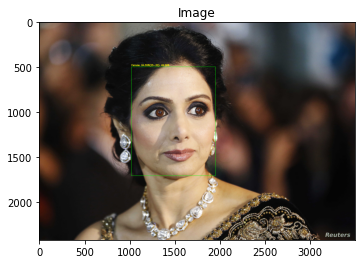

In [43]:
for image_name in image_list:
  detect_age_gender(image_name)